In [1]:
using Pkg
if isfile("../Project.toml") && isfile("../Manifest.toml")
    Pkg.activate("..");
end

function printer(x::Any, verbose="")
    if verbose != ""
        println(verbose)
    end
    show(stdout, "text/plain", x)
    println("")
end

using Plots, Random, Distributions, LinearAlgebra, JuliaProbo
gr();

 Activating environment at `~/HOME/Programming/JuliaProbo/Project.toml`
┌ Info: Precompiling JuliaProbo [3c270a3a-2612-4193-9bf7-68cd93c8ae26]
└ @ Base loading.jl:1278


┌ Info: Saved animation to 
│   fn = /home/mamoru/HOME/Programming/JuliaProbo/notebook/ch4_sim7.gif
└ @ Plots /home/mamoru/.julia/packages/Plots/KN96c/src/animation.jl:104


Plots.AnimatedGif("/home/mamoru/HOME/Programming/JuliaProbo/notebook/ch4_sim7.gif")
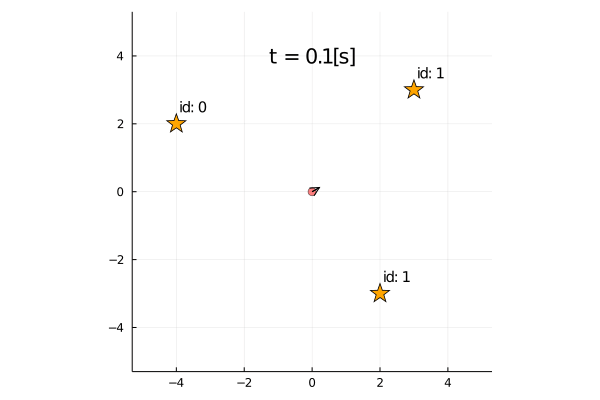

In [2]:
function main()
    xlim = [-5.0, 5.0]
    ylim = [-5.0, 5.0]
    world = World(xlim, ylim)
    circling_agent = Agent(0.2, 10.0 / 180 * pi)
    landmarks = [Landmark([-4.0, 2.0], 0), Landmark([2.0, -3.0], 1), Landmark([3.0, 3.0], 1)]
    m = Map()
    push!(m, landmarks)
    robot = RealRobot([0.0, 0.0, pi/6], circling_agent, RealCamera(landmarks); color="red")
    push!(world, robot)
    push!(world, m)
    dt = 0.1
    anim = @animate for i in 1:300
        t = dt * i
        annota = "t = $(round(t, sigdigits=3))[s]"
        p = draw(world, annota)
        plot(p)
        obsv = observations(robot.sensor_, robot.pose_)
        v, ω = decision(circling_agent, obsv)
        state_transition(robot, v, ω, dt)
    end
    gif(anim, "ch4_sim7.gif", fps=10)
end
main()